# Unbalanced train

# Test set - evaluation

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
test_check = np.load('../../data/save/test_pred_set.npy')
test_check_df = pd.DataFrame(test_check, columns=['x1', 'y1', 'z1', 'ampl1', 'clsize1', 'unique_mod1', 'x2', 'y2', 'z2', 'ampl2', 'clsize2', 'unique_mod2', 'true', 'pred', 'out'])

pos_test_subset = test_check_df[test_check_df['true'] == 1]
neg_test_subset = test_check_df[test_check_df['true'] == 0]
test_check_df.describe()

In [9]:
len(pos_test_subset)/ len(test_check_df)

0.0

/var/folders/2d/2bpr68ns0kxcczp3bcphl0kw0000gn/T/ipykernel_49507/3312839683.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale('log')


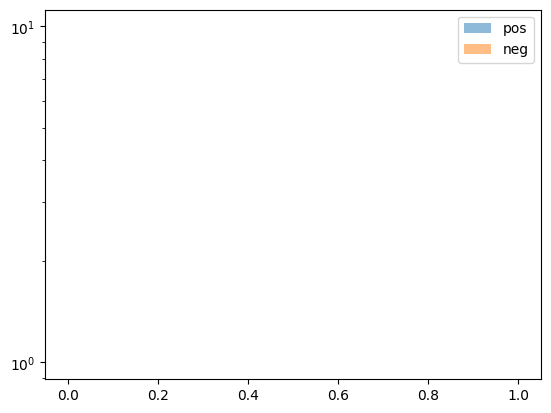

In [10]:
# plot the distribution of the true and predicted values_test

fig, ax = plt.subplots()

plt.hist(pos_test_subset['out'], bins=100, alpha=0.5, label='pos')
plt.hist(neg_test_subset['out'], bins=100, alpha=0.5, label='neg')

ax.set_yscale('log')
plt.legend()


In [11]:
def eval_precision_sensitivity(threshold, df):
    tp = len(df[(df['out'] > threshold) & (df['true'] == 1)])
    fp = len(df[(df['out'] > threshold) & (df['true'] == 0)])
    tn = len(df[(df['out'] <= threshold) & (df['true'] == 0)])
    fn = len(df[(df['out'] <= threshold) & (df['true'] == 1)])
    precision = tp / (tp + fp)
    sensitivity = tp / (tp + fn)
    return precision, sensitivity

In [12]:
# roc curve
thresholds = np.linspace(0.5, 0.95, 9)
roc_test = [eval_precision_sensitivity(threshold, test_check_df) for threshold in thresholds]

ZeroDivisionError: division by zero

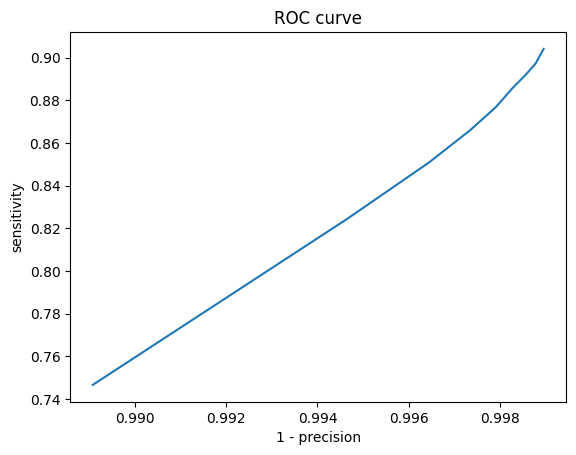

In [17]:
fig, ax = plt.subplots()
compl_precision = [1 - precision for precision, sensitivity in roc_test]
plt.plot(compl_precision, [sensitivity for precision, sensitivity in roc_test],)
plt.xlabel('1 - precision')
plt.ylabel('sensitivity')
plt.title('ROC curve')
plt.show()

# Train set - evaluation

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
train_check = np.load('../../data/save/train_pred_set.npy')
train_check_df = pd.DataFrame(train_check, columns=['x1', 'y1', 'z1', 'ampl1', 'clsize1', 'unique_mod1', 'x2', 'y2', 'z2', 'ampl2', 'clsize2', 'unique_mod2', 'true', 'pred', 'out'])

pos_train_subset = train_check_df[train_check_df['true'] == 1]
neg_train_subset = train_check_df[train_check_df['true'] == 0]
train_check_df.describe()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/save/train_pred_set.npy'

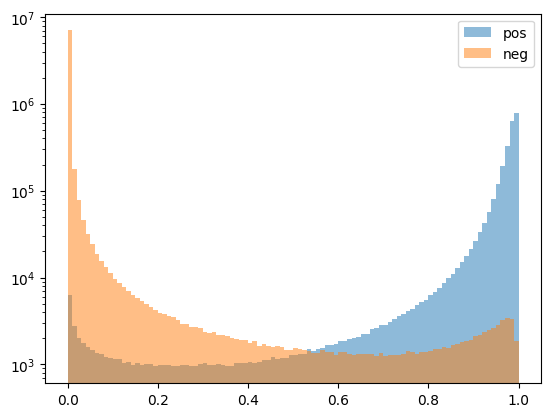

In [6]:
fig, ax = plt.subplots()

plt.hist(pos_train_subset['out'], bins=100, alpha=0.5, label='pos')
plt.hist(neg_train_subset['out'], bins=100, alpha=0.5, label='neg')

ax.set_yscale('log')
plt.legend()


In [18]:
# roc curve
thresholds = np.linspace(0.5, 0.95, 9)
roc_train = [eval_precision_sensitivity(threshold, train_check_df) for threshold in thresholds]

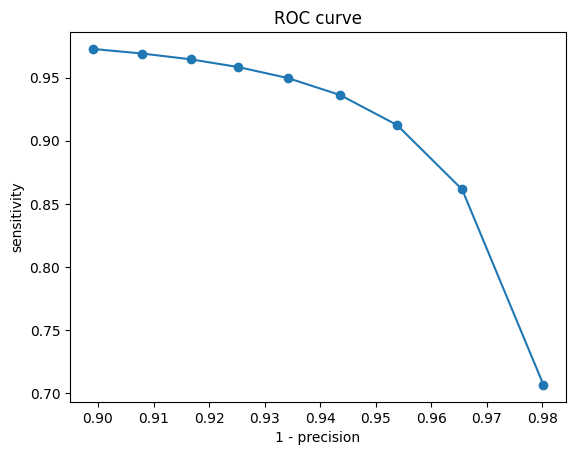

In [21]:
fig, ax = plt.subplots()
compl_precision = [precision for precision, sensitivity in roc_train]
plt.plot(compl_precision, [sensitivity for precision, sensitivity in roc_train], marker='o')
plt.xlabel('1 - precision')
plt.ylabel('sensitivity')
plt.title('ROC curve')
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
train_check = np.load('../../data/save/train_pred_set.npy')
train_check_df = pd.DataFrame(train_check, columns=['x1', 'y1', 'z1', 'ampl1', 'clsize1', 'unique_mod1', 'x2', 'y2', 'z2', 'ampl2', 'clsize2', 'unique_mod2', 'true', 'pred', 'out'])

pos_train_subset = train_check_df[train_check_df['true'] == 1]
neg_train_subset = train_check_df[train_check_df['true'] == 0]
train_check_df.describe()

FileNotFoundError: [Errno 2] No such file or directory: '../../data/save/train_pred_set.npy'

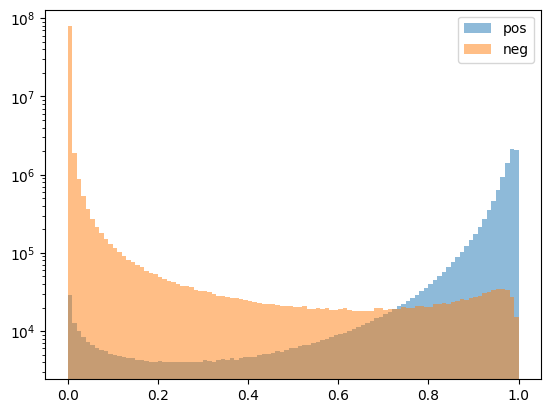

In [9]:
fig, ax = plt.subplots()

plt.hist(pos_train_subset['out'], bins=100, alpha=0.5, label='pos')
plt.hist(neg_train_subset['out'], bins=100, alpha=0.5, label='neg')

ax.set_yscale('log')
plt.legend()


# Train dataset - preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = np.memmap('../../data/save/train_dataset.npy', dtype=np.float32, mode='r', shape=(564935, 10))
upper = train.shape[0]//4
train_df = pd.DataFrame(train, columns = ['x1', 'y1', 'z1', 'clsize1', 'ampl1', 'unique_module_id1', 'particle_id1', 'weight1', 'event_id1', 'hit_id1'])
train_df.describe()

,x1,y1,z1,clsize1,ampl1,unique_module_id1,particle_id1,weight1,event_id1,hit_id1
count,564935.000000,564935.000000,564935.000000,564935.000000,564935.000000,564935.000000,5.649350e+05,564935.000000,564935.000000,564935.000000
mean,-0.000164,-0.000025,0.000026,0.050213,0.086224,0.090387,3.795794e+17,0.000009,1012.058716,56777.949219
std,1.063121,1.061896,1.017382,1.020608,1.061555,1.039377,2.940945e+17,0.000008,1.422529,33116.003906
min,-3.566102,-3.524859,-2.819714,-0.568357,-0.710670,-1.071247,0.000000e+00,0.000000,1010.000000,1.000000
25%,-0.347301,-0.349179,-0.626052,-0.430684,-0.579810,-0.816239,9.008148e+16,0.000004,1011.000000,28247.000000
50%,-0.002041,-0.000346,-0.001064,-0.293011,-0.304949,-0.271070,3.467906e+17,0.000007,1012.000000,56494.000000
75%,0.348254,0.349178,0.629191,0.120007,0.509654,0.723171,6.440156e+17,0.000012,1013.000000,84741.000000
max,3.556723,3.521153,2.818731,10.307796,23.725843,2.823973,9.727816e+17,0.000194,1014.000000,126166.000000


In [3]:
train_pair = np.memmap('../../data/save/train_pair_dataset.npy', dtype=np.float32, mode='r', shape=(15019440, 13))
upper = train_pair.shape[0]//4
train_pair_df = pd.DataFrame(train_pair, columns = ['x1', 'y1', 'z1', 'clsize1', 'ampl1', 'unique_module_id1', 'x2', 'y2', 'z2', 'clsize2', 'ampl2', 'unique_module_id2', 'same_track'])
train_pair_df.describe()

,x1,y1,z1,clsize1,ampl1,unique_module_id1,x2,y2,z2,clsize2,ampl2,unique_module_id2,same_track
count,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07,1.501944e+07
mean,6.942238e-07,-6.725359e-08,-5.075757e-07,3.693331e-02,3.412764e-02,3.186756e-02,-2.376239e-07,-4.855952e-08,-5.198439e-07,3.689171e-02,3.398992e-02,3.192707e-02,3.329142e-01
std,1.012521e+00,1.012418e+00,1.022706e+00,1.025180e+00,1.022132e+00,1.011903e+00,1.012483e+00,1.012426e+00,1.022719e+00,1.025237e+00,1.021679e+00,1.011915e+00,4.712561e-01
min,-3.566102e+00,-3.524859e+00,-2.819714e+00,-7.060299e-01,-7.122510e-01,-1.071247e+00,-3.565531e+00,-3.523600e+00,-2.820403e+00,-7.061428e-01,-7.115718e-01,-1.071388e+00,0.000000e+00
25%,-3.159313e-01,-3.169412e-01,-6.514259e-01,-4.306842e-01,-5.818700e-01,-8.266388e-01,-3.156895e-01,-3.165778e-01,-6.520647e-01,-4.306308e-01,-5.814265e-01,-8.268132e-01,0.000000e+00
50%,-3.111293e-03,-1.633996e-03,-4.912374e-04,-2.930114e-01,-3.049494e-01,-3.008142e-01,-2.828563e-03,-1.521757e-03,-8.667407e-04,-2.928749e-01,-3.049491e-01,-3.010596e-01,0.000000e+00
75%,3.170984e-01,3.167587e-01,6.512066e-01,1.200071e-01,2.419951e-01,5.794429e-01,3.170380e-01,3.172121e-01,6.509037e-01,1.203930e-01,2.470126e-01,5.803264e-01,1.000000e+00
max,3.556723e+00,3.521153e+00,2.818731e+00,1.030780e+01,2.372584e+01,2.823973e+00,3.556817e+00,3.519731e+00,2.818670e+00,1.031433e+01,2.368579e+01,2.823306e+00,1.000000e+00


# Test dataset - preprocessing

In [8]:

test = np.memmap('../../data/save/test_dataset.npy', dtype=np.float32, mode='r', shape=(18623, 10))
upper = test.shape[0]//4
test_df = pd.DataFrame(test, columns = ['x1', 'y1', 'z1', 'clsize1', 'ampl1', 'unique_module_id1', 'particle_id1', 'weight1', 'event_id1', 'hit_id1'])
test_df.describe()

,x1,y1,z1,clsize1,ampl1,unique_module_id1,particle_id1,weight1,event_id1,hit_id1
count,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,1.862300e+04,1.862300e+04,18623.000000,18623.000000
mean,-0.016128,-0.012091,-0.021980,0.314316,0.640250,1.123983,2.428373e+16,7.817322e-07,1001.000061,64125.195312
std,1.556892,1.555988,1.241195,0.936868,0.872312,1.065074,1.137679e+17,3.884606e-06,0.000000,24711.064453
min,-3.510457,-3.490650,-3.424606,-0.335404,-0.477994,-0.639321,0.000000e+00,0.000000e+00,1001.000000,20.000000
25%,-0.967596,-0.973607,-0.762660,-0.185614,-0.117043,0.187150,0.000000e+00,0.000000e+00,1001.000000,49569.500000
50%,-0.013324,-0.015100,-0.026686,0.113966,0.634588,1.128905,0.000000e+00,0.000000e+00,1001.000000,70664.000000
75%,0.913245,0.925615,0.703139,0.413546,1.386219,2.039757,0.000000e+00,0.000000e+00,1001.000000,85263.500000
max,3.503962,3.484148,3.433890,8.801781,9.278345,2.989166,8.827133e+17,9.430450e-05,1001.000000,93680.000000


In [13]:
test_pair = np.memmap('../../data/save/test_pair_dataset.npy', dtype=np.float32, mode='r', shape=(173398754, 13))
upper = test_pair.shape[0]//2
test_pair_df = pd.DataFrame(test_pair[:18623, :], columns = ['x1', 'y1', 'z1', 'clsize1', 'ampl1', 'unique_module_id1', 'x2', 'y2', 'z2', 'clsize2', 'ampl2', 'unique_module_id2', 'same_track'])
test_pair_df.describe()

,x1,y1,z1,clsize1,ampl1,unique_module_id1,x2,y2,z2,clsize2,ampl2,unique_module_id2,same_track
count,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000,18623.000000
mean,-0.317098,-0.055184,-1.433683,-0.075116,-0.397296,-0.638976,-0.014729,-0.007185,-0.053800,0.197515,0.411934,0.741191,0.000054
std,0.181838,0.047683,0.659997,0.264219,0.047057,0.000302,1.359756,1.375121,1.132668,0.952141,0.895579,1.162583,0.007328
min,-0.560342,-0.133999,-1.738700,-0.485194,-0.492858,-0.639321,-3.509723,-3.490741,-3.424274,-0.485214,-0.492765,-0.639220,0.000000
25%,-0.456332,-0.082182,-1.738119,-0.335404,-0.406379,-0.639321,-0.576157,-0.561470,-0.624234,-0.335372,-0.365409,-0.413332,0.000000
50%,-0.393745,-0.078029,-1.738119,-0.035824,-0.373005,-0.638933,-0.002886,-0.003321,0.004572,-0.035686,0.258815,0.537295,0.000000
75%,-0.200973,-0.003302,-1.733478,0.113966,-0.372808,-0.638739,0.546686,0.563672,0.481861,0.264000,1.010395,1.739577,0.000000
max,-0.002871,0.002700,0.004642,0.263756,-0.339789,-0.638546,3.504192,3.484201,3.433417,8.355515,9.277773,2.988546,1.000000


# Dataframe structure

In [14]:
test_df = pd.read_csv('../../data/save/test_reco_tracks.csv')
test_df.describe()

,x,y,z,cl_size,amplitude,particle_id,weight,event,hit_id,unique_module_id,track_id
count,93680.000000,93680.000000,93680.000000,93680.000000,93680.000000,9.368000e+04,93680.000000,93680.0,93680.000000,93680.000000,93680.000000
mean,-0.001918,-0.012514,-0.043715,0.150121,0.145658,3.705170e+17,0.000011,1001.0,46840.500000,5613.450950,2772.810664
std,1.092118,1.091860,1.059485,1.051993,1.107930,3.049881e+17,0.000010,0.0,27043.230946,5038.583948,2561.857260
min,-3.601983,-3.576219,-2.916341,-0.483600,-0.681372,0.000000e+00,0.000000,1001.0,1.000000,0.000000,0.000000
25%,-0.353584,-0.367327,-0.692647,-0.343167,-0.559718,4.504376e+16,0.000005,1001.0,23420.750000,1198.000000,478.000000
50%,-0.006053,-0.003412,-0.029675,-0.202735,-0.272894,3.377955e+17,0.000009,1001.0,46840.500000,3891.000000,2048.000000
75%,0.362989,0.346423,0.587885,0.218563,0.577706,6.395129e+17,0.000014,1001.0,70260.250000,8910.000000,4659.000000
max,3.592540,3.573718,2.906141,10.189270,22.693290,9.097356e+17,0.000232,1001.0,93680.000000,18727.000000,8763.000000
